In [1]:
import torch
import torchvision
from project1_model_16 import project1_model_16
from project1_model_32 import project1_model_32
from project1_model_64 import project1_model_64
from project1_model_48 import project1_model_48
from torchsummary import summary
from torchtoolbox.transform import CIFAR10Policy, Cutout
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Normalize
import matplotlib.pyplot as plt

In [2]:
model_16 = project1_model_16().cuda()
summary(model_16, input_size=[(3, 32, 32)])

model_32 = project1_model_32().cuda()
summary(model_32, input_size=[(3, 32, 32)])

model_48 = project1_model_48().cuda()
summary(model_48, input_size=[(3, 32, 32)])

model_64 = project1_model_64().cuda()
summary(model_64, input_size=[(3, 32, 32)])


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
            Conv2d-3           [-1, 16, 32, 32]           2,304
       BatchNorm2d-4           [-1, 16, 32, 32]              32
            Conv2d-5           [-1, 16, 32, 32]           2,304
       BatchNorm2d-6           [-1, 16, 32, 32]              32
        BasicBlock-7           [-1, 16, 32, 32]               0
            Conv2d-8           [-1, 16, 32, 32]           2,304
       BatchNorm2d-9           [-1, 16, 32, 32]              32
           Conv2d-10           [-1, 16, 32, 32]           2,304
      BatchNorm2d-11           [-1, 16, 32, 32]              32
       BasicBlock-12           [-1, 16, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           4,608
      BatchNorm2d-14           [-1, 32,

In [3]:
Epoch = 160
Batch_size = 128
Loss = torch.nn.CrossEntropyLoss()
optimizer_16 = torch.optim.Adam(model_16.parameters(), lr=1e-3)
optimizer_32 = torch.optim.Adam(model_32.parameters(), lr=1e-3)
optimizer_48 = torch.optim.Adam(model_48.parameters(), lr=1e-3)
optimizer_64 = torch.optim.Adam(model_64.parameters(), lr=1e-3)

In [4]:
transform_train = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(), ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
trainingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train)
testdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test)




Files already downloaded and verified
Files already downloaded and verified


In [5]:
trainDataLoader_16 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_16 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_16 = []
test_loss_history_16 = []
test_acc_history_16 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_16):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_16.zero_grad()
        predicted_output = model_16(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_16.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_16):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_16(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_16)
    test_loss = test_loss / len(testDataLoader_16)
    test_acc = test_acc / test_total

    train_loss_history_16.append(train_loss)
    test_loss_history_16.append(test_loss)
    test_acc_history_16.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.4671960258118026, Test loss 1.2626372817196423, Test acc 0.5496
Epoch 1, Train loss 1.056857373098583, Test loss 0.9792626469950133, Test acc 0.6545
Epoch 2, Train loss 0.85745140948259, Test loss 0.8729696628413622, Test acc 0.6956
Epoch 3, Train loss 0.7437026501464112, Test loss 0.7628641007821771, Test acc 0.7358
Epoch 4, Train loss 0.6592273815056248, Test loss 0.7030902867075763, Test acc 0.7545
Epoch 5, Train loss 0.6003809036958553, Test loss 0.6210314299486861, Test acc 0.7823
Epoch 6, Train loss 0.5571513973233645, Test loss 0.6098198215418225, Test acc 0.7888
Epoch 7, Train loss 0.5214322441069367, Test loss 0.5922032745578621, Test acc 0.7925
Epoch 8, Train loss 0.4926452645865243, Test loss 0.5808123086072221, Test acc 0.7987
Epoch 9, Train loss 0.4677013593256626, Test loss 0.5696558228021935, Test acc 0.8025
Epoch 10, Train loss 0.4494182205261172, Test loss 0.5271476933473274, Test acc 0.8205
Epoch 11, Train loss 0.42821574214931646, Test loss 0.51

Epoch 94, Train loss 0.07597095271824952, Test loss 0.5534119406078435, Test acc 0.869
Epoch 95, Train loss 0.0700209472695237, Test loss 0.5598876734700384, Test acc 0.8667
Epoch 96, Train loss 0.07198990150676358, Test loss 0.5646258790658999, Test acc 0.8652
Epoch 97, Train loss 0.07491669648438883, Test loss 0.5361493361901634, Test acc 0.8727
Epoch 98, Train loss 0.07160443844168883, Test loss 0.592212405763095, Test acc 0.8654
Epoch 99, Train loss 0.06923733961761303, Test loss 0.567737717417222, Test acc 0.8638
Epoch 100, Train loss 0.0680797511373487, Test loss 0.5874673844892767, Test acc 0.8644
Epoch 101, Train loss 0.06620982448425135, Test loss 0.5541829712028745, Test acc 0.8707
Epoch 102, Train loss 0.06553686360168792, Test loss 0.5891042334746711, Test acc 0.8641
Epoch 103, Train loss 0.07040573699433175, Test loss 0.5423646863502792, Test acc 0.8714
Epoch 104, Train loss 0.06433254448920869, Test loss 0.572419339720207, Test acc 0.8694
Epoch 105, Train loss 0.066095294

In [6]:
trainDataLoader_32 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_32 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_32 = []
test_loss_history_32 = []
test_acc_history_32 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_32):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_32.zero_grad()
        predicted_output = model_32(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_32.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_32):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_32(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_32)
    test_loss = test_loss / len(testDataLoader_32)
    test_acc = test_acc / test_total

    train_loss_history_32.append(train_loss)
    test_loss_history_32.append(test_loss)
    test_acc_history_32.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.3764143604451737, Test loss 1.1514902688279938, Test acc 0.585
Epoch 1, Train loss 0.9260157305566247, Test loss 0.8489376480066324, Test acc 0.7037
Epoch 2, Train loss 0.7399083635081416, Test loss 0.7357391518882558, Test acc 0.7481
Epoch 3, Train loss 0.6297891133124262, Test loss 0.6789700222920768, Test acc 0.7668
Epoch 4, Train loss 0.5559051597057401, Test loss 0.579173066570789, Test acc 0.8028
Epoch 5, Train loss 0.5035548287127024, Test loss 0.5643788617623003, Test acc 0.8038
Epoch 6, Train loss 0.4580021339761632, Test loss 0.5177757800379886, Test acc 0.824
Epoch 7, Train loss 0.4209011343815138, Test loss 0.4836745794060864, Test acc 0.8377
Epoch 8, Train loss 0.38795470086205036, Test loss 0.4984444036513944, Test acc 0.8272
Epoch 9, Train loss 0.36084798614844643, Test loss 0.4440883381080024, Test acc 0.8483
Epoch 10, Train loss 0.3377691806887117, Test loss 0.4587234236017058, Test acc 0.849
Epoch 11, Train loss 0.32391538389046176, Test loss 0.4

Epoch 94, Train loss 0.027482733557112705, Test loss 0.5183145975387549, Test acc 0.8934
Epoch 95, Train loss 0.03071437600661841, Test loss 0.5207835252903685, Test acc 0.889
Epoch 96, Train loss 0.030950409614199967, Test loss 0.5210463915821872, Test acc 0.8919
Epoch 97, Train loss 0.029068827077084223, Test loss 0.5248316960244239, Test acc 0.8922
Epoch 98, Train loss 0.03034192159780256, Test loss 0.5404456731262086, Test acc 0.8932
Epoch 99, Train loss 0.02596814848293248, Test loss 0.5156549762321424, Test acc 0.8948
Epoch 100, Train loss 0.02800075894446753, Test loss 0.4996038871475413, Test acc 0.8962
Epoch 101, Train loss 0.02872541365827031, Test loss 0.505168529439576, Test acc 0.8988
Epoch 102, Train loss 0.024439477864021668, Test loss 0.497270791402346, Test acc 0.8992
Epoch 103, Train loss 0.025749456097819673, Test loss 0.5324215234457692, Test acc 0.8949
Epoch 104, Train loss 0.030640799004960893, Test loss 0.48545625900165945, Test acc 0.8998
Epoch 105, Train loss 0

In [11]:
trainDataLoader_48 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_48 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_48 = []
test_loss_history_48 = []
test_acc_history_48 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_48):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_48.zero_grad()
        predicted_output = model_48(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_48.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_48):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_48(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_48)
    test_loss = test_loss / len(testDataLoader_48)
    test_acc = test_acc / test_total

    train_loss_history_48.append(train_loss)
    test_loss_history_48.append(test_loss)
    test_acc_history_48.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.3964835353519605, Test loss 1.1439371561702294, Test acc 0.587
Epoch 1, Train loss 0.93106550054477, Test loss 0.9140198977687691, Test acc 0.6745
Epoch 2, Train loss 0.7326919796216823, Test loss 0.7398860944977289, Test acc 0.7407
Epoch 3, Train loss 0.620215539660905, Test loss 0.6492968733552136, Test acc 0.7793
Epoch 4, Train loss 0.5356447386467243, Test loss 0.5798054910913298, Test acc 0.8052
Epoch 5, Train loss 0.4788813165691503, Test loss 0.5577684837051585, Test acc 0.8126
Epoch 6, Train loss 0.4312134008578327, Test loss 0.5336321637600283, Test acc 0.817
Epoch 7, Train loss 0.39600983281117264, Test loss 0.5011659307947641, Test acc 0.8318
Epoch 8, Train loss 0.3687735380190413, Test loss 0.4571695916260345, Test acc 0.8455
Epoch 9, Train loss 0.34092287955534123, Test loss 0.4514896803641621, Test acc 0.8436
Epoch 10, Train loss 0.3133749133714325, Test loss 0.4201447605332242, Test acc 0.8617
Epoch 11, Train loss 0.28884246596671126, Test loss 0.43

Epoch 93, Train loss 0.022862595752241265, Test loss 0.48815103639152985, Test acc 0.9078
Epoch 94, Train loss 0.020299287825522712, Test loss 0.47346677810330934, Test acc 0.9076
Epoch 95, Train loss 0.021362681581732244, Test loss 0.5067639068900784, Test acc 0.8996
Epoch 96, Train loss 0.02053352107089656, Test loss 0.5129871589096286, Test acc 0.9008
Epoch 97, Train loss 0.020952434108867678, Test loss 0.5241366775729989, Test acc 0.8998
Epoch 98, Train loss 0.018579468870831145, Test loss 0.4949848582095738, Test acc 0.9036
Epoch 99, Train loss 0.020974336026172102, Test loss 0.5233019303671921, Test acc 0.8971
Epoch 100, Train loss 0.018529317145684825, Test loss 0.5277573719054838, Test acc 0.9031
Epoch 101, Train loss 0.02261854831532449, Test loss 0.4987436232121685, Test acc 0.902
Epoch 102, Train loss 0.020423226117249043, Test loss 0.48950696538520766, Test acc 0.9053
Epoch 103, Train loss 0.016635035854883972, Test loss 0.4930707836830163, Test acc 0.9068
Epoch 104, Train 

In [8]:
trainDataLoader_64 = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader_64 = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_64 = []
test_loss_history_64 = []
test_acc_history_64 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader_64):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_64.zero_grad()
        predicted_output = model_64(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_64.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader_64):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_64(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader_64)
    test_loss = test_loss / len(testDataLoader_64)
    test_acc = test_acc / test_total

    train_loss_history_64.append(train_loss)
    test_loss_history_64.append(test_loss)
    test_acc_history_64.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.4345000925881173, Test loss 1.1840518599824061, Test acc 0.5727
Epoch 1, Train loss 0.9570415898052322, Test loss 0.8917218733437454, Test acc 0.6939
Epoch 2, Train loss 0.7461940745258575, Test loss 0.7572364090364191, Test acc 0.7372
Epoch 3, Train loss 0.6207874692461984, Test loss 0.656160355368747, Test acc 0.772
Epoch 4, Train loss 0.5394075641699154, Test loss 0.5434461469891705, Test acc 0.8153
Epoch 5, Train loss 0.4758256052613563, Test loss 0.5140348378616043, Test acc 0.8294
Epoch 6, Train loss 0.4270420915559125, Test loss 0.46801758265193505, Test acc 0.8371
Epoch 7, Train loss 0.38336086315114787, Test loss 0.4520636006623884, Test acc 0.8473
Epoch 8, Train loss 0.356051126747485, Test loss 0.4502303494682795, Test acc 0.8469
Epoch 9, Train loss 0.3272483141144828, Test loss 0.4196711656036256, Test acc 0.8625
Epoch 10, Train loss 0.30317731887635674, Test loss 0.4118896104112456, Test acc 0.8614
Epoch 11, Train loss 0.27880360452872716, Test loss 0

Epoch 93, Train loss 0.016797055265374356, Test loss 0.43679850668752496, Test acc 0.9169
Epoch 94, Train loss 0.017737217648315085, Test loss 0.43806379778852944, Test acc 0.9155
Epoch 95, Train loss 0.016816130487883673, Test loss 0.4570745424002032, Test acc 0.9111
Epoch 96, Train loss 0.01920236577763689, Test loss 0.4089916623845885, Test acc 0.9144
Epoch 97, Train loss 0.015464768738529342, Test loss 0.4459425977702382, Test acc 0.9132
Epoch 98, Train loss 0.013962552696198482, Test loss 0.45017145677835124, Test acc 0.9159
Epoch 99, Train loss 0.01504614023921822, Test loss 0.41408287762086604, Test acc 0.9199
Epoch 100, Train loss 0.019587342132358094, Test loss 0.44335174975515923, Test acc 0.9138
Epoch 101, Train loss 0.0136915525494297, Test loss 0.44368884250333035, Test acc 0.9094
Epoch 102, Train loss 0.015339103225163658, Test loss 0.4600303399411938, Test acc 0.9138
Epoch 103, Train loss 0.017411434380432873, Test loss 0.43983090395414376, Test acc 0.9152
Epoch 104, Tra

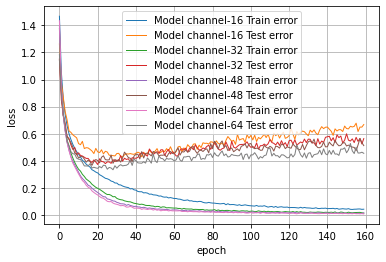

In [12]:
plt.plot(range(Epoch), train_loss_history_16, '-', linewidth=1, label='Model channel-16 Train error')
plt.plot(range(Epoch), test_loss_history_16, '-', linewidth=1, label='Model channel-16 Test error')
plt.plot(range(Epoch), train_loss_history_32, '-', linewidth=1, label='Model channel-32 Train error')
plt.plot(range(Epoch), test_loss_history_32, '-', linewidth=1, label='Model channel-32 Test error')
plt.plot(range(Epoch), train_loss_history_48, '-', linewidth=1, label='Model channel-48 Train error')
plt.plot(range(Epoch), test_loss_history_48, '-', linewidth=1, label='Model channel-48 Test error')
plt.plot(range(Epoch), train_loss_history_64, '-', linewidth=1, label='Model channel-64 Train error')
plt.plot(range(Epoch), test_loss_history_64, '-', linewidth=1, label='Model channel-64 Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [13]:
print('Best Test acc for Model channel-16: %s' % (max(test_acc_history_16)))
print('Best Test acc for Model channel-32: %s' % (max(test_acc_history_32)))
print('Best Test acc for Model channel-48: %s' % (max(test_acc_history_48)))
print('Best Test acc for Model channel-64: %s' % (max(test_acc_history_64)))


Best Test acc for Model channel-16: 0.8762
Best Test acc for Model channel-32: 0.9023
Best Test acc for Model channel-48: 0.9125
Best Test acc for Model channel-64: 0.9234
